# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
import numpy as np
import math 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below.

# Write the function to calculate slope as: 
# (mean(x) * mean(y) – mean(x*y)) / ( mean (x)^2 – mean( x^2))
def calc_slope(xs,ys):
    return ((np.mean(xs)* np.mean(ys)) - np.mean(xs*ys)) / ((np.mean(xs)**2) - (np.mean(xs*xs)))

# calculate best fit line slope and intercept
def best_fit(xs,ys):
    m = calc_slope(xs,ys)
    c = np.mean(ys) - (m*np.mean(xs))
    return m, c

# calculate the regression line
def reg_line (m, c, xs):
    y_line_values = []
    for x in xs:
        y_line_values.append((m*x)+c)
    return y_line_values

# calculate squared error
def sq_err(y_a, y_b):
    """
    input
    y_a : true y values
    y_b : regression line

    
    return
    squared error between regression and true line (ss_tot)
    """
    ya_minus_yb = np.subtract(y_a,y_b)
    sq = [i**2 for i in ya_minus_yb]
    return sum(sq)

# calculate r-squared
def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    Y_mean = np.mean(y_real)
    sse = sq_err(y_real,y_predicted)
    sst = sq_err(y_real,Y_mean)
    
    return 1 - sse/sst

def complete_regression(xs, ys):
    m, c = best_fit(xs, ys)
    reg_line_y = reg_line(m, c, xs)
    print(f'Basic Regression Diagnostics \n' 
          '-------------------\n' 
          f'Slope: {np.round(m, 2)}\n' 
          f'Y-intercept: {np.round(c, 2)}\n'
          f'R-Squared: {np.round(r_squared(ys,reg_line_y),2)}\n'
          '-------------------\n'
         f'Model: Y = {np.round(m,2)} * X + {np.round(c,2)}')
    plt.scatter(xs, ys, color='blue', label='values')
    plt.plot(xs, reg_line_y, color='red', label='reg line')
    plt.legend()

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


In [3]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

Basic Regression Diagnostics 
-------------------
Slope: 0.56
Y-intercept: 6.33
R-Squared: 0.97
-------------------
Model: Y = 0.56 * X + 6.33


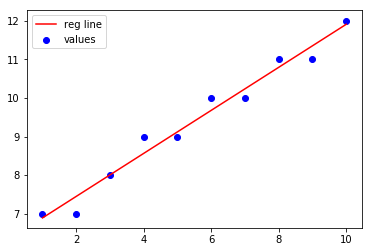

In [4]:
complete_regression(X,Y)

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

Basic Regression Diagnostics 
-------------------
Slope: 0.56
Y-intercept: 6.33
R-Squared: 0.97
-------------------
Model: Y = 0.56 * X + 6.33


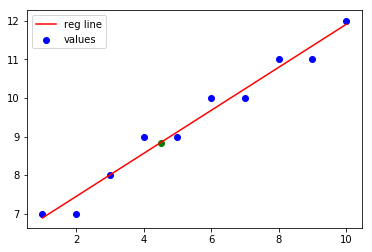

In [5]:
test_x = 4.5
m, c = best_fit(X,Y)
test_y = (m*test_x) + c

complete_regression(X,Y)
plt.scatter(test_x,test_y, color='green', label='Test Point');

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [8]:
df = pd.read_csv('heightWeight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


Basic Regression Diagnostics 
-------------------
Slope: 5.54
Y-intercept: -204.48
R-Squared: 0.96
-------------------
Model: Y = 5.54 * X + -204.48


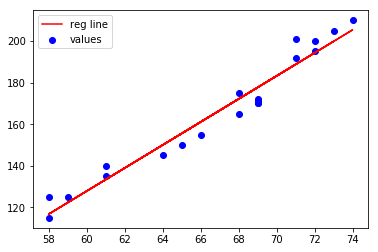

In [9]:
complete_regression(df['height'],df['weight'])

Basic Regression Diagnostics 
-------------------
Slope: 5.54
Y-intercept: -204.48
R-Squared: 0.96
-------------------
Model: Y = 5.54 * X + -204.48


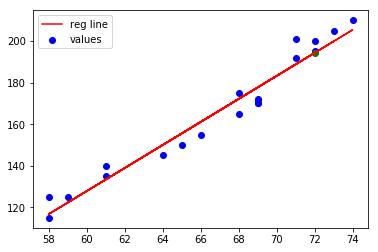

In [12]:
x_height = df['height']
y_weight = df['weight']

test_h = 72
m,c = best_fit(x_height, y_weight)

test_w = (m*test_h) + c

complete_regression(x_height,y_weight)
plt.scatter(test_h, test_w, color='green', label='test height')